In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [3]:
import qplot.activate
import qplot

2020-10-23 15:08:46.526 | INFO     | qplot.activate:<module>:24 - IPython detected, applying inline plotting and svg figure format.


In [4]:
MARKET_DATA_PATH = '/home/vlad/production/data/fx/2020-09-21'

In [5]:
dst = xr.open_dataset(Path(MARKET_DATA_PATH)/'fx_rates.ncdf')

In [6]:
dst

<xarray.Dataset>
Dimensions:   (currency: 8, date: 5000)
Coordinates:
  * date      (date) datetime64[ns] 2001-07-23 2001-07-24 ... 2020-09-21
  * currency  (currency) object 'AUD' 'CAD' 'CZK' 'EUR' 'GBP' 'JPY' 'NOK' 'SEK'
Data variables:
    close     (currency, date) float64 ...
    high      (currency, date) float64 ...
    low       (currency, date) float64 ...
    open      (currency, date) float64 ...

In [7]:
df = dst['close'].to_pandas().T
rets = df.pct_change().fillna(0)

In [8]:
ser = df['AUD']

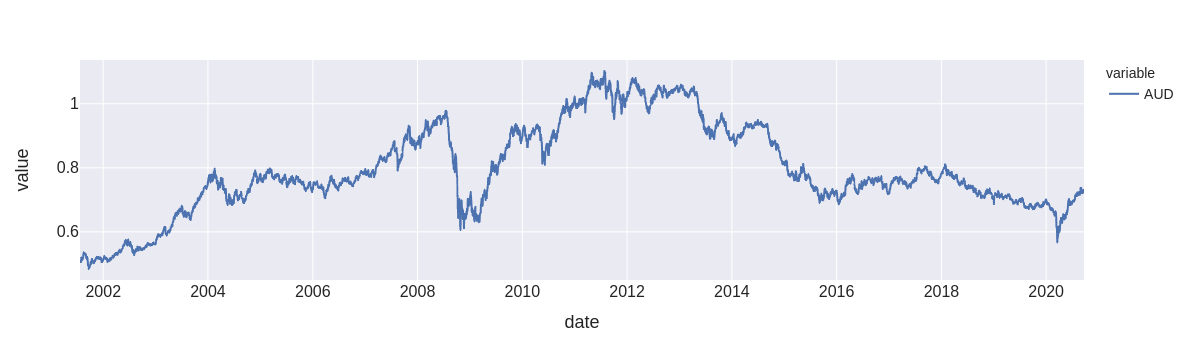

In [9]:
with qplot.plot(6, wide=True, engine='plotly') as p:
    fig = ser.plot();
    p.set_fig(fig)

## TSA

In [10]:
import statsmodels.api as sm

In [10]:
r = rets['AUD']

In [11]:
rets

currency         AUD       CAD       CZK       EUR       GBP       JPY  \
date                                                                     
2001-07-23  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2001-07-24 -0.000984  0.000000  0.000000  0.007715  0.003807  0.000000   
2001-07-25 -0.000591  0.000000  0.000000  0.005599  0.002318  0.000000   
2001-07-26  0.002169  0.000000  0.000000 -0.002386  0.000631  0.000000   
2001-07-27 -0.000984  0.000000  0.000000 -0.002164 -0.002871  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-09-15  0.001097  0.000000 -0.006742 -0.001517  0.003347  0.000000   
2020-09-16  0.000411  0.000659  0.000000 -0.002701  0.005974  0.000000   
2020-09-17  0.000959  0.000527  0.002262  0.002285  0.000308  0.000000   
2020-09-18 -0.003284 -0.003293 -0.002257 -0.000253 -0.004394  0.010526   
2020-09-21 -0.008786 -0.007004 -0.020362 -0.006166 -0.007666 -0.010417   

currency         NOK       SEK  
date                            
2001-07-23  0.000000  0.000000  
2001-07-24  0.000000  0.000000  
2001-07-25  0.000000  0.000000  
2001-07-26  0.000000  0.000000  
2001-07-27  0.000000  0.000000  
...              ...       ...  
2020-09-15  0.000000 -0.001761  
2020-09-16  0.000905 -0.001764  
2020-09-17 -0.002712  0.002650  
2020-09-18 -0.002720  0.000881  
2020-09-21 -0.021818 -0.008803  

[5000 rows x 8 columns]

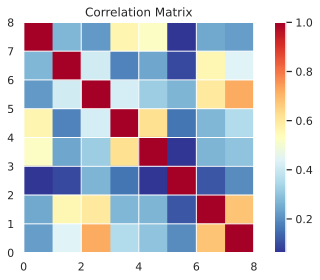

In [12]:
sm.graphics.plot_corr(rets.corr());


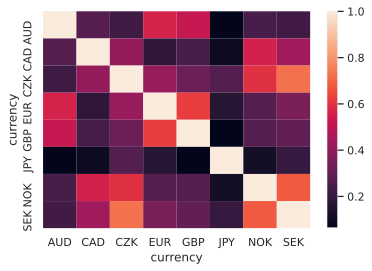

In [13]:
sns.heatmap(rets.corr());  # sns is much better - with labels

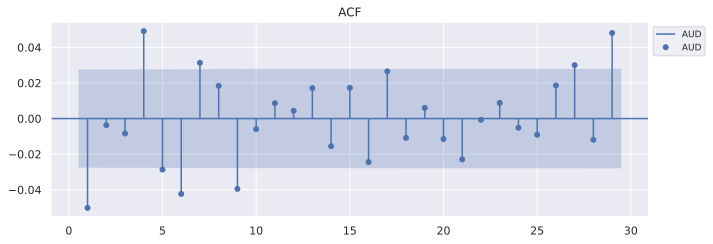

In [14]:
#statsmodels ACF plot is good!
with qplot.plot(wide=True, title='ACF') as p:
    sm.graphics.tsa.plot_acf(r, lags=range(1, 30), ax=p.ax(), label='AUD');
    
# problem with the legend (double label, should be one combined)
    
# how CI is calculated?? can I change the confidence?

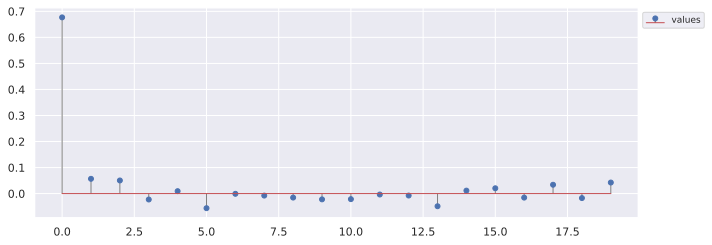

In [15]:
ccf = sm.tsa.stattools.ccf(rets['NOK'], rets['SEK'])
with qplot.plot(wide=True) as p:
    qplot.Stem().plot(range(20), ccf[:20], ax=p.ax())
    
# how to construct CIs for CCF?

In [16]:
import statsmodels
res = statsmodels.tsa.arima.model.ARIMA(r, order=(3, 0, 2)).fit()
res.summary()

/home/vlad/miniconda3/envs/daily/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/vlad/miniconda3/envs/daily/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/vlad/miniconda3/envs/daily/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/vlad/miniconda3/envs/daily/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/vlad/miniconda3/envs/daily/lib/python3.8/site-packages/stat

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    AUD   No. Observations:                 5000
Model:                 ARIMA(3, 0, 2)   Log Likelihood               17081.910
Date:                Fri, 23 Oct 2020   AIC                         -34149.819
Time:                        13:10:20   BIC                         -34104.199
Sample:                             0   HQIC                        -34133.830
                               - 5000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.887e-05      0.000      0.833      0.405      -0.000       0.000
ar.L1      -2.021e-06      0.004     -0.001      1.000      -0.007       0.007
ar.L2      -1.509e-07      0.003  -5.42e-05      1.000      -0.005       0.005
ar.L3      -3.376e-07      0.006  -5.33e-05      1.000      -0.012       0.012
ma.L1      -2.022e-06      0.004     -0.001      1.000      -0.007       0.007
ma.L2      -1.513e-07      0.003  -5.43e-05      1.000      -0.005       0.005
sigma2       6.31e-05   5.17e-07    121.940      0.000    6.21e-05    6.41e-05
===================================================================================
Ljung-Box (L1) (Q):                  12.60   Jarque-Bera (JB):             34703.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.8e+17. Standard errors may be unstable.
"""

In [17]:
res.f_test()

TypeError: f_test() missing 1 required positional argument: 'r_matrix'

In [ ]:
comp_idx = pd.MultiIndex.from_arrays([(r.index - (r.index - pd.offsets.YearBegin())).days, 
                                      r.index.year], names=['day_count', 'year'])

In [ ]:
(r.index - (r.index - pd.offsets.YearBegin())).days

In [ ]:
rr = pd.Series(r.values, comp_idx).reorder_levels(['year', 'day_count']).sort_index()

In [ ]:
rr.unstack('year')
rr


In [ ]:
rr

In [ ]:
rr.index[rr.index.duplicated()]

In [18]:
r.index[r.index.duplicated()]

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)

In [19]:
rr.index.get_loc((2008, 366))

NameError: name 'rr' is not defined

In [20]:
(r.index[1943] - (r.index[1943] - pd.offsets.YearBegin())).days

366

In [21]:
ss = r.index - (r.index - pd.offsets.YearBegin())
ss[1941]

Timedelta('364 days 00:00:00')

In [22]:
rr.index[1941]# - pd.offsets.YearBegin()

NameError: name 'rr' is not defined

## New part

In [23]:
sm.tsa.plot_acf(r)

AttributeError: module 'statsmodels.tsa.api' has no attribute 'plot_acf'

In [24]:
r.corr(r.shift())

-0.0502000353531808

No handles with labels found to put in legend.


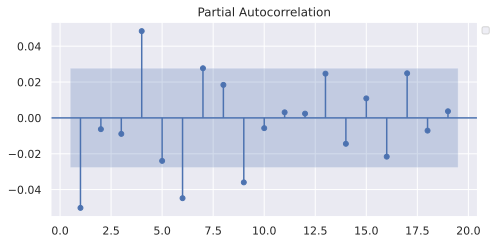

In [25]:
with qplot.plot() as p:
    sm.graphics.tsa.plot_pacf(r, ax=p.ax(), lags=range(1, 20));

In [26]:
len(r), 1/np.sqrt(len(r))*1.95

(5000, 0.027577164466275353)

In [27]:
sm.stats.diagnostic.acorr_ljungbox(r, lags=[1, 2, 3], return_df=True)

lb_stat  lb_pvalue
1  12.604621   0.000385
2  12.675077   0.001769
3  13.027149   0.004578

In [28]:
out = statsmodels.tsa.ar_model.AutoReg(r, lags=3, old_names=False).fit()
out.summary()

/home/vlad/miniconda3/envs/daily/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    AUD   No. Observations:                 5000
Model:                     AutoReg(3)   Log Likelihood               17076.776
Method:               Conditional MLE   S.D. of innovations              0.008
Date:                Fri, 23 Oct 2020   AIC                             -9.671
Time:                        13:10:25   BIC                             -9.664
Sample:                             3   HQIC                            -9.668
                                 5000                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.973      0.331      -0.000       0.000
AUD.L1        -0.0506      0.014     -3.575      0.000      -0.078      -0.023
AUD.L2        -0.0067      0.014     -0.476      0.634      -0.035       0.021
AUD.L3        -0.0089      0.014     -0.630      0.528      -0.037       0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.6747           -0.0000j            4.6747           -0.5000
AR.2            1.9591           -4.4889j            4.8978           -0.1845
AR.3            1.9591           +4.4889j            4.8978            0.1845
-----------------------------------------------------------------------------
"""

In [29]:
df = pd.concat([r.shift(i) for i in range(1, 4)], axis=1).fillna(0)
out = sm.OLS(r, df).fit()
out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    AUD   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              4.368
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                     0.00445
Time:                        13:10:26   Log-Likelihood:                          17088.
No. Observations:                5000   AIC:                                 -3.417e+04
Df Residuals:                    4997   BIC:                                 -3.415e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AUD           -0.0504      0.014     -3.562      0.000      -0.078      -0.023
AUD           -0.0065      0.014     -0.462      0.644      -0.034       0.021
AUD           -0.0087      0.014     -0.617      0.537      -0.036       0.019
==============================================================================
Omnibus:                     1172.804   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32266.976
Skew:                          -0.496   Prob(JB):                         0.00
Kurtosis:                      15.406   Cond. No.                         1.07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
sm.tsa.stattools.adfuller(ser)

(-2.134565773517426,
 0.23084452729369626,
 9,
 4990,
 {'1%': -3.4316611557350547,
  '5%': -2.862119388798601,
  '10%': -2.5670784094039782},
 -36363.27048787803)

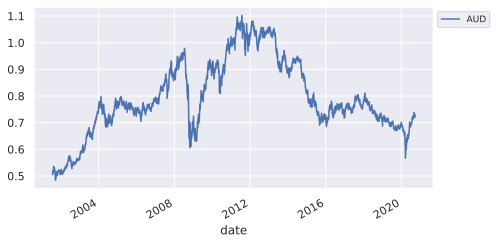

In [31]:
with qplot.plot():
    ser.plot()

In [32]:
from arch import arch_model

am = arch_model(100*r)
res = am.fit()
res.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3807053.951043522
Iteration:      2,   Func. Count:     15,   Neg. LLF: 5944.254321499369
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5935771.897747959
Iteration:      4,   Func. Count:     27,   Neg. LLF: 6291.060763007799
Iteration:      5,   Func. Count:     33,   Neg. LLF: 5150.407807221389
Iteration:      6,   Func. Count:     39,   Neg. LLF: 6596.22112497926
Iteration:      7,   Func. Count:     46,   Neg. LLF: 5135.14713103338
Iteration:      8,   Func. Count:     52,   Neg. LLF: 5136.981502028524
Iteration:      9,   Func. Count:     59,   Neg. LLF: 5124.8828684098535
Iteration:     10,   Func. Count:     65,   Neg. LLF: 5123.783773385872
Iteration:     11,   Func. Count:     70,   Neg. LLF: 5123.782455921006
Iteration:     12,   Func. Count:     75,   Neg. LLF: 5123.7824491358915
Iteration:     13,   Func. Count:     79,   Neg. LLF: 5123.782449137466
Optimization terminated successfully    (Exit mode 0)
          

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    AUD   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -5123.78
Distribution:                  Normal   AIC:                           10255.6
Method:            Maximum Likelihood   BIC:                           10281.6
                                        No. Observations:                 5000
Date:                Fri, Oct 23 2020   Df Residuals:                     4996
Time:                        13:10:29   Df Model:                            4
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0105  8.733e-03      1.204      0.229 [-6.601e-03,2.763e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      5.5675e-03  1.406e-03      3.960  7.506e-05 [2.812e-03,8.323e-03]
alpha[1]       0.0617  7.382e-03      8.359  6.320e-17 [4.724e-02,7.618e-02]
beta[1]        0.9283  7.646e-03    121.418      0.000     [  0.913,  0.943]
============================================================================

Covariance estimator: robust
"""

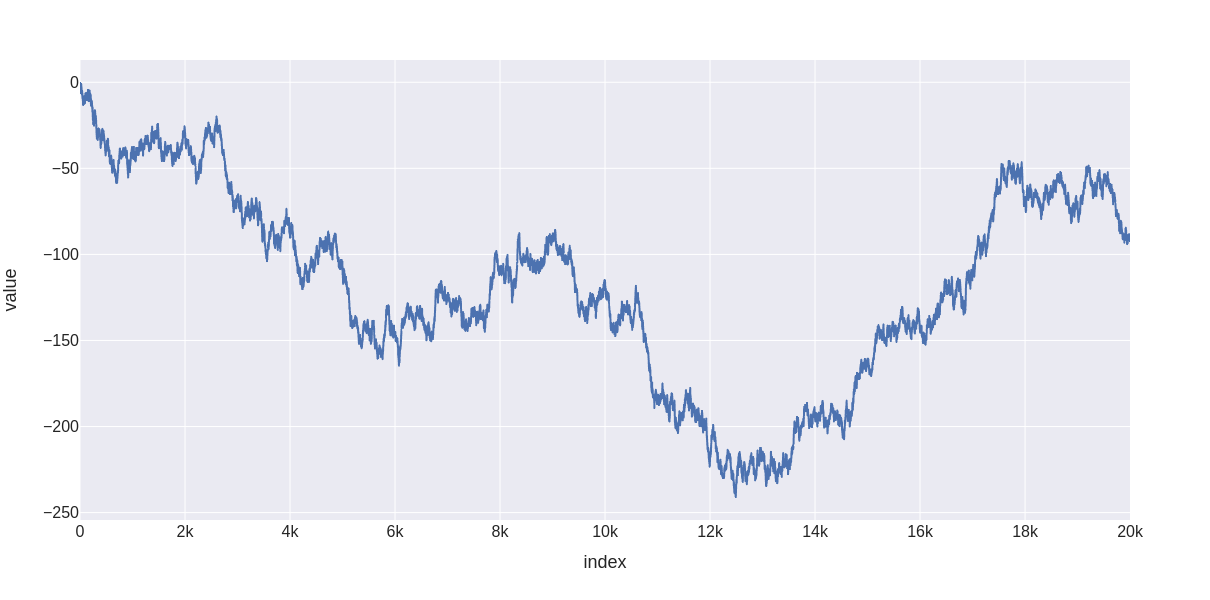

In [33]:
arparams = -0.0001*np.ones(200)
#arparams[:10] = -0.2
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.array([1]) # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 20000)
with qplot.plot(10, legend=False, wide=True, engine='plotly') as p:
    fig = pd.Series(y).cumsum().plot()
    p.set_fig(fig)

In [34]:
y

array([-2.0022549 , -1.00933899, -0.25723655, ...,  0.55254064,
        0.79413342,  0.59246501])

## OLS, hyp. testing, p-values, etc

In [35]:
rets.head()

currency         AUD  CAD  CZK       EUR       GBP  JPY  NOK  SEK
date                                                             
2001-07-23  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0
2001-07-24 -0.000984  0.0  0.0  0.007715  0.003807  0.0  0.0  0.0
2001-07-25 -0.000591  0.0  0.0  0.005599  0.002318  0.0  0.0  0.0
2001-07-26  0.002169  0.0  0.0 -0.002386  0.000631  0.0  0.0  0.0
2001-07-27 -0.000984  0.0  0.0 -0.002164 -0.002871  0.0  0.0  0.0

In [36]:
eur = rets['EUR']
gbp = rets['GBP']
aud = rets['AUD']

In [37]:
eur.std()*np.sqrt(260), gbp.std()*np.sqrt(260), aud.std()*np.sqrt(260)

(0.09492622060449482, 0.09494406506653104, 0.1281082691927279)

In [38]:
corr = eur.corr(aud)
corr, corr**2

(0.5604702430978311, 0.3141268933981419)

In [39]:
sm.OLS(eur, aud).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    EUR   R-squared (uncentered):                   0.314
Model:                            OLS   Adj. R-squared (uncentered):              0.314
Method:                 Least Squares   F-statistic:                              2290.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                        0.00
Time:                        13:10:31   Log-Likelihood:                          19523.
No. Observations:                5000   AIC:                                 -3.904e+04
Df Residuals:                    4999   BIC:                                 -3.904e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AUD            0.4154      0.009     47.858      0.000       0.398       0.432
==============================================================================
Omnibus:                      280.614   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1046.928
Skew:                           0.145   Prob(JB):                    4.60e-228
Kurtosis:                       5.223   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No handles with labels found to put in legend.


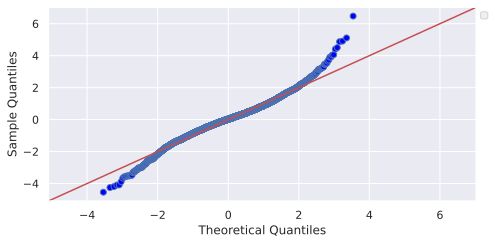

In [40]:
with qplot.plot() as p:
    sm.qqplot((eur/eur.std()).values, line='45', ax=p.ax());

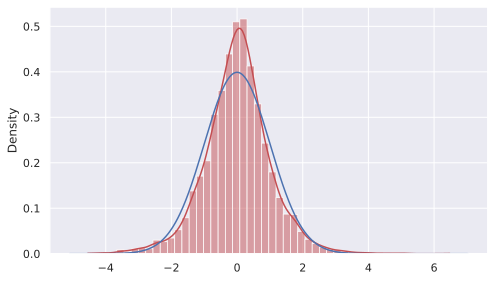

In [41]:
import scipy as sp
vals = (eur/eur.std()).values
with qplot.plot(8, legend=False) as p:
    sns.histplot(vals, bins=50, ax=p.ax(), kde=True, stat='density', color='r')
    qplot.plot_func(sp.stats.norm.pdf, ax=p.ax())

In [42]:
gbp

date
2001-07-23    0.000000
2001-07-24    0.003807
2001-07-25    0.002318
2001-07-26    0.000631
2001-07-27   -0.002871
                ...   
2020-09-15    0.003347
2020-09-16    0.005974
2020-09-17    0.000308
2020-09-18   -0.004394
2020-09-21   -0.007666
Name: GBP, Length: 5000, dtype: float64

### Kalman vs rolling OLS

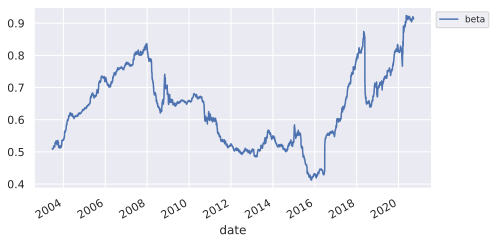

In [43]:
from statsmodels.regression.rolling import RollingOLS
mdl = RollingOLS(gbp, eur, window=500, min_nobs=200)
out = mdl.fit()
betas = out.params[lambda x: x.notnull()]

with qplot.plot(legend_labels=['beta']) as p:
    betas.plot(ax=p.ax());

In [49]:
ser

date
2001-07-23    0.5079
2001-07-24    0.5074
2001-07-25    0.5071
2001-07-26    0.5082
2001-07-27    0.5077
               ...  
2020-09-15    0.7298
2020-09-16    0.7301
2020-09-17    0.7308
2020-09-18    0.7284
2020-09-21    0.7220
Name: AUD, Length: 5000, dtype: float64

In [54]:
mdl = sm.tsa.UnobservedComponents(ser, 'local level', cycle=True)

/home/vlad/miniconda3/envs/daily/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



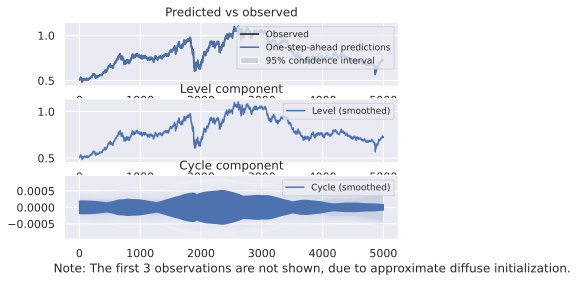

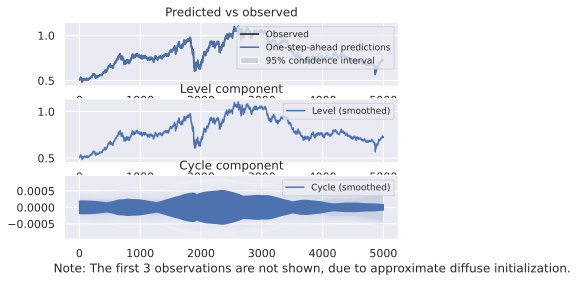

In [55]:
#with qplot.plot() as p:
mdl.fit().plot_components()

In [222]:
import requests
from io import BytesIO
from zipfile import ZipFile

# Download the dataset
ck = requests.get('http://staff.feweb.vu.nl/koopman/projects/ckbook/OxCodeAll.zip').content
zipped = ZipFile(BytesIO(ck))
df = pd.read_table(
    BytesIO(zipped.read('OxCodeIntroStateSpaceBook/Chapter_2/NorwayFinland.txt')),
    skiprows=1, header=None, sep='\s+', engine='python',
    names=['date','nf', 'ff']
)

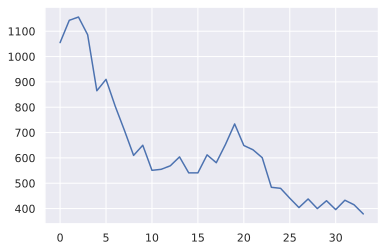

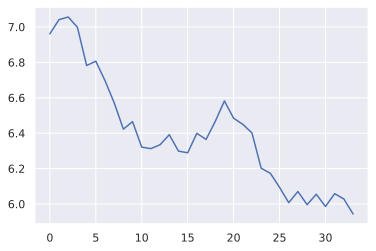

In [227]:
df.index = pd.date_range(start='%d-01-01' % df.date[0], end='%d-01-01' % df.iloc[-1, 0], freq='AS')

# Log transform
df['lff'] = np.log(df['ff'])

# Setup the model
mod = LocalLinearTrend(df['lff'])

# Fit it using MLE (recall that we are fitting the three variance parameters)
res = mod.filter(mod.fit().params)

plt.plot(df['ff'].values.flatten())
plt.show()
plt.plot(res.filtered_state.flatten()[:len(df)])

In [272]:
"""
Univariate Local Linear Trend Model
"""
class LocalLinearTrend(sm.tsa.statespace.MLEModel):
    def __init__(self, endog):
        # Model order
        k_states = k_posdef = 2

        # Initialize the statespace
        super(LocalLinearTrend, self).__init__(
            endog, k_states=k_states, k_posdef=k_posdef,
            initialization='approximate_diffuse',
            loglikelihood_burn=k_states
        )

        # Initialize the matrices
        self.ssm['design'] = np.array([1, 0])
        self.ssm['transition'] = np.array([[1, 1],
                                       [0, 1]])
        self.ssm['selection'] = np.eye(k_states)

        # Cache some indices
        self._state_cov_idx = ('state_cov',) + np.diag_indices(k_posdef)

    @property
    def param_names(self):
        return ['sigma2.measurement', 'sigma2.level', 'sigma2.trend']

    @property
    def start_params(self):
        return [np.std(self.endog)]*3

    def transform_params(self, unconstrained):
        return unconstrained**2

    def untransform_params(self, constrained):
        return constrained**0.5

    def update(self, params, *args, **kwargs):
        params = super(LocalLinearTrend, self).update(params, *args, **kwargs)

        # Observation covariance
        self.ssm['obs_cov',0,0] = params[0]

        # State covariance
        self.ssm[self._state_cov_idx] = params[1:]

In [278]:
import requests
from io import BytesIO
from zipfile import ZipFile

# Download the dataset
ck = requests.get('http://staff.feweb.vu.nl/koopman/projects/ckbook/OxCodeAll.zip').content
zipped = ZipFile(BytesIO(ck))
df = pd.read_table(
    BytesIO(zipped.read('OxCodeIntroStateSpaceBook/Chapter_2/NorwayFinland.txt')),
    skiprows=1, header=None, sep='\s+', engine='python',
    names=['date','nf', 'ff']
)

<AxesSubplot:>

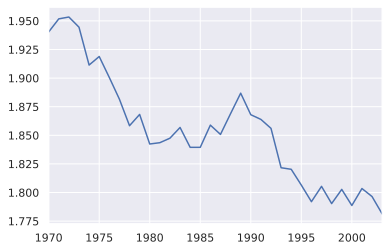

In [302]:
np.log(df['lff']).plot()

<AxesSubplot:>

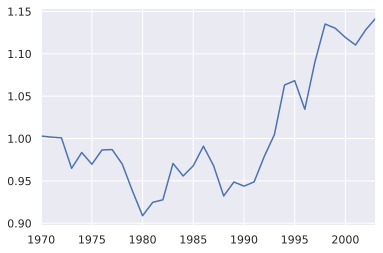

In [319]:
xx.plot()

In [350]:
df.index = pd.date_range(start='%d-01-01' % df.date[0], end='%d-01-01' % df.iloc[-1, 0], freq='AS')

# Log transform
df['lff'] = np.log(df['ff'])


xx = pd.Series(ser/3000.0)+1
xx = pd.Series(xx.iloc[:len(df['lff'])].values, index=df.index)

#xx = df['lff']

# Setup the model
mod = LocalLinearTrend(xx)  #(df['lff'])

# Fit it using MLE (recall that we are fitting the three variance parameters)
res = mod.fit(disp=False)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   34
Model:               LocalLinearTrend   Log Likelihood                  70.513
Date:                Tue, 27 Oct 2020   AIC                           -135.027
Time:                        14:14:59   BIC                           -130.629
Sample:                    01-01-1970   HQIC                          -133.569
                         - 01-01-2003                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
sigma2.measurement  2.662e-11      0.000   2.44e-07      1.000      -0.000       0.000
sigma2.level           0.0006      0.000      1.921      0.055   -1.25e-05       0.001
sigma2.trend        

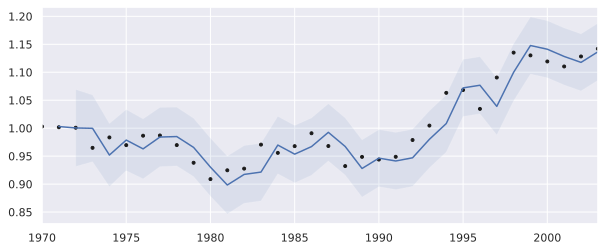

In [354]:
predict = res.get_prediction()
forecast = res.get_forecast('2014')



fig, ax = plt.subplots(figsize=(10,4))

# Plot the results
#df['lff'].plot(ax=ax, style='k.', label='Observations')

xx.plot(ax=ax, style='k.', label='Observations')
predict.predicted_mean.iloc[1:].plot(ax=ax, label='One-step-ahead Prediction')
predict_ci = predict.conf_int(alpha=0.05)
predict_index = np.arange(len(predict_ci))
ax.fill_between(predict_index[2:], predict_ci.iloc[2:, 0], predict_ci.iloc[2:, 1], alpha=0.1)

#forecast.predicted_mean.plot(ax=ax, style='r', label='Forecast')
#forecast_ci = forecast.conf_int()
#forecast_index = np.arange(len(predict_ci), len(predict_ci) + len(forecast_ci))
#ax.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], alpha=0.1)
#
## Cleanup the image
#ax.set_ylim((4, 8));
#legend = ax.legend(loc='lower left');

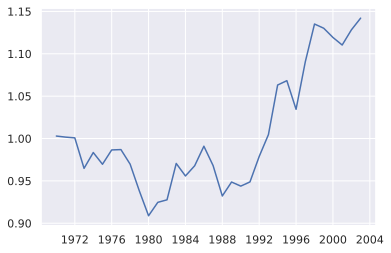

In [355]:
##df['lff'].plot()
plt.plot(xx)

In [356]:
flt = mod.filter(res.params)

In [357]:
ff = flt.filtered_state

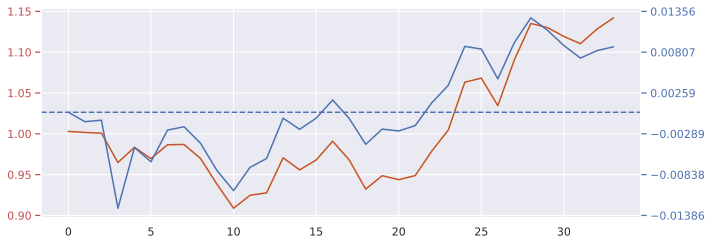

In [358]:
with qplot.plot(wide=True, twin_ax=True) as p:
    p.ax(1).plot(ff.T[:,0], c='yellow')
    p.ax(1).plot(xx.values, c='r')
    p.ax(2).plot(ff.T[:,1], c='b')
    p.ax(2).axhline(0, c='b', ls='--')

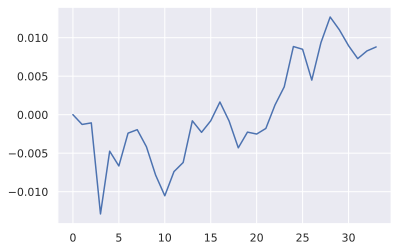

In [360]:
plt.plot(ff.T[:,1])

## Time-varying beta using Kalman filter

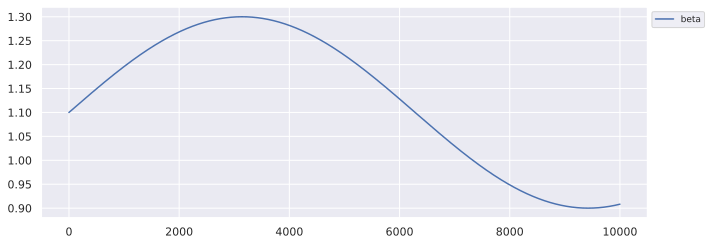

In [376]:
npts = 10000
beta = 1.1 + 0.2*np.sin(np.linspace(0, 5, npts))
with qplot.plot(wide=True):
    plt.plot(beta, label='beta')

In [377]:
rets_mkt = rng.normal(scale=0.3/16, size=npts)
stock_idio_rets = rng.normal(scale=0.6/16, size=npts)
stock_rets = stock_idio_rets + beta*rets_mkt

In [378]:
import scipy as sp
print(np.corrcoef(rets_mkt, stock_rets))

sm.OLS(stock_rets, rets_mkt).fit().summary()

[[1.         0.48887756]
 [0.48887756 1.        ]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.239
Model:                            OLS   Adj. R-squared (uncentered):              0.239
Method:                 Least Squares   F-statistic:                              3140.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):                        0.00
Time:                        14:41:52   Log-Likelihood:                          18662.
No. Observations:               10000   AIC:                                 -3.732e+04
Df Residuals:                    9999   BIC:                                 -3.731e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1239      0.020     56.039      0.000       1.085       1.163
==============================================================================
Omnibus:                        0.932   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.895
Skew:                          -0.014   Prob(JB):                        0.639
Kurtosis:                       3.037   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

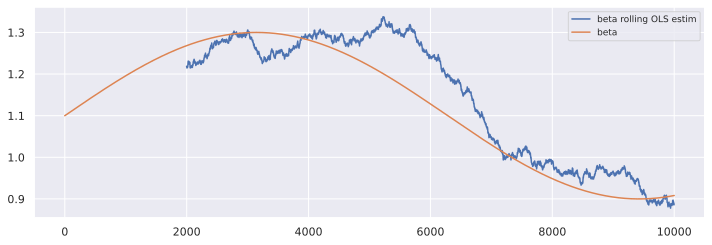

In [392]:
from statsmodels.regression.rolling import RollingOLS
beta_estim = RollingOLS(stock_rets, rets_mkt, window=2000).fit(params_only=True)
with qplot.plot(wide=True, legend_outside=False) as p:
    plt.plot(beta_estim.params.flatten(), label='beta rolling OLS estim')
    plt.plot(beta, label='beta')

In [447]:

"""
Univariate Local Linear Trend Model
"""
class TimeVarBeta(sm.tsa.statespace.MLEModel):
    def __init__(self, endog):
        # Model order
        k_states = k_posdef = 1

        # Initialize the statespace
        super(TimeVarBeta, self).__init__(
            endog, k_states=k_states, k_posdef=k_posdef,
            initialization='approximate_diffuse',
            loglikelihood_burn=k_states
        )

        # Initialize the matrices
        self.ssm['design'] = rets_mkt.reshape((1, 1, len(rets_mkt)))
        self.ssm['transition'] = np.array([[1]])
        self.ssm['selection'] = np.array([[1]])
        self.ssm['state_cov'] = np.array([[0.0001]])



    @property
    def start_params(self):
        return [1]*2


    def update(self, params, *args, **kwargs):
        params = super(TimeVarBeta, self).update(params, *args, **kwargs)

        # Observation covariance
        self.ssm['obs_cov',0,0] = params[0]
        #self.ssm['state_cov',0,0] = params[1]


In [448]:
mod = TimeVarBeta(stock_rets)
res = mod.fit()
flt = mod.filter(res.params)

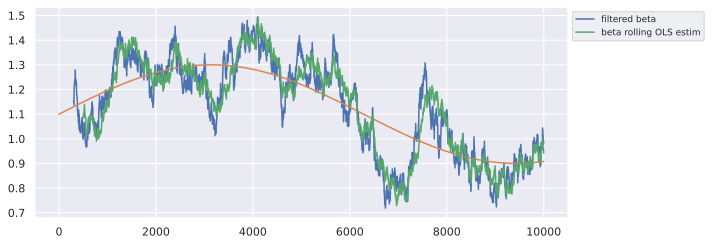

In [451]:
from statsmodels.regression.rolling import RollingOLS
beta_estim = RollingOLS(stock_rets, rets_mkt, window=500).fit(params_only=True)

with qplot.plot(wide=True) as p:
    fs = flt.filtered_state.flatten()
    fs[:300] = np.nan
    plt.plot(fs, label='filtered beta')
    #p.ax().set_ylim((-0, 2))
    plt.plot(beta)
    plt.plot(beta_estim.params.flatten(), label='beta rolling OLS estim')

In [419]:
res.summary()

/home/vlad/miniconda3/envs/daily/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:2937: RuntimeWarning:

divide by zero encountered in true_divide



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                    TimeVarBeta   Log Likelihood               18557.822
Date:                Tue, 27 Oct 2020   AIC                         -37111.644
Time:                        15:23:02   BIC                         -37097.224
Sample:                             0   HQIC                        -37106.763
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
param.0        0.0014   1.95e-05     70.433      0.000       0.001       0.001
param.1        1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.69   Prob(JB):                         0.42
Heteroskedasticity (H):               1.07   Skew:                            -0.02
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""